In [271]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.io as pio

import plotly.express as px
pio.renderers.default = 'notebook'

# 6 УРОК

## ОКОННЫЕ ФУНКЦИИ И ИНТЕРАКТИВНЫЕ ГРАФИКИ

# Имеется следующий набор данных от Hass Avocado Board 🥑:

### Date — дата
### AveragePrice — средняя цена одного авокадо
### Total Volume — количество проданных авокадо
### 4046 — количество проданных авокадо PLU* 4046
### 4225 — количество проданных авокадо PLU 4225
### 4770 — количество проданных авокадо PLU 4770
### Total Bags — всего упаковок
### Small Bags — маленькие упаковки
### Large Bags — большие
### XLarge Bags — очень большие
### type — обычный или органический
### year — год
### Region — город или регион the city or region of the observation
#### *PLU — код товара (Product Lookup code)

# В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи.

In [272]:
sns.set(
    font_scale = 2,
    style = "whitegrid",
    rc = {'figure.figsize': (20,7)})

# Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные.

In [273]:
avocado_mean = pd.read_csv("D:/курс_архив/my_files/lesson_6/avocado_mean.csv",
                           index_col=0, parse_dates=['Date'])

In [274]:
avocado_mean = avocado_mean.reset_index()

In [275]:
avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


# Задача 1 "Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки."

In [276]:
# Группируем данные по дате и считаем среднюю цену за каждый день
first = avocado_mean.groupby('Date') \
    .agg({'AveragePrice': 'mean'}) \
    .sort_values('Date', ascending=True)  # Сортировка по дате в порядке возрастания
first

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037
...,...
2018-02-25,1.359630
2018-03-04,1.350185
2018-03-11,1.335093


In [277]:
# Применяем скользящее среднее с окном равным 3
rolling_avg = first.rolling(window=3).mean()

In [278]:
# Находим максимальное значение скользящего среднего и округляем до 2 знаков после запятой
max_value = round(rolling_avg['AveragePrice'].max(), 2)
max_value

np.float64(1.85)

# Ответ 1.85

<Axes: xlabel='Date'>

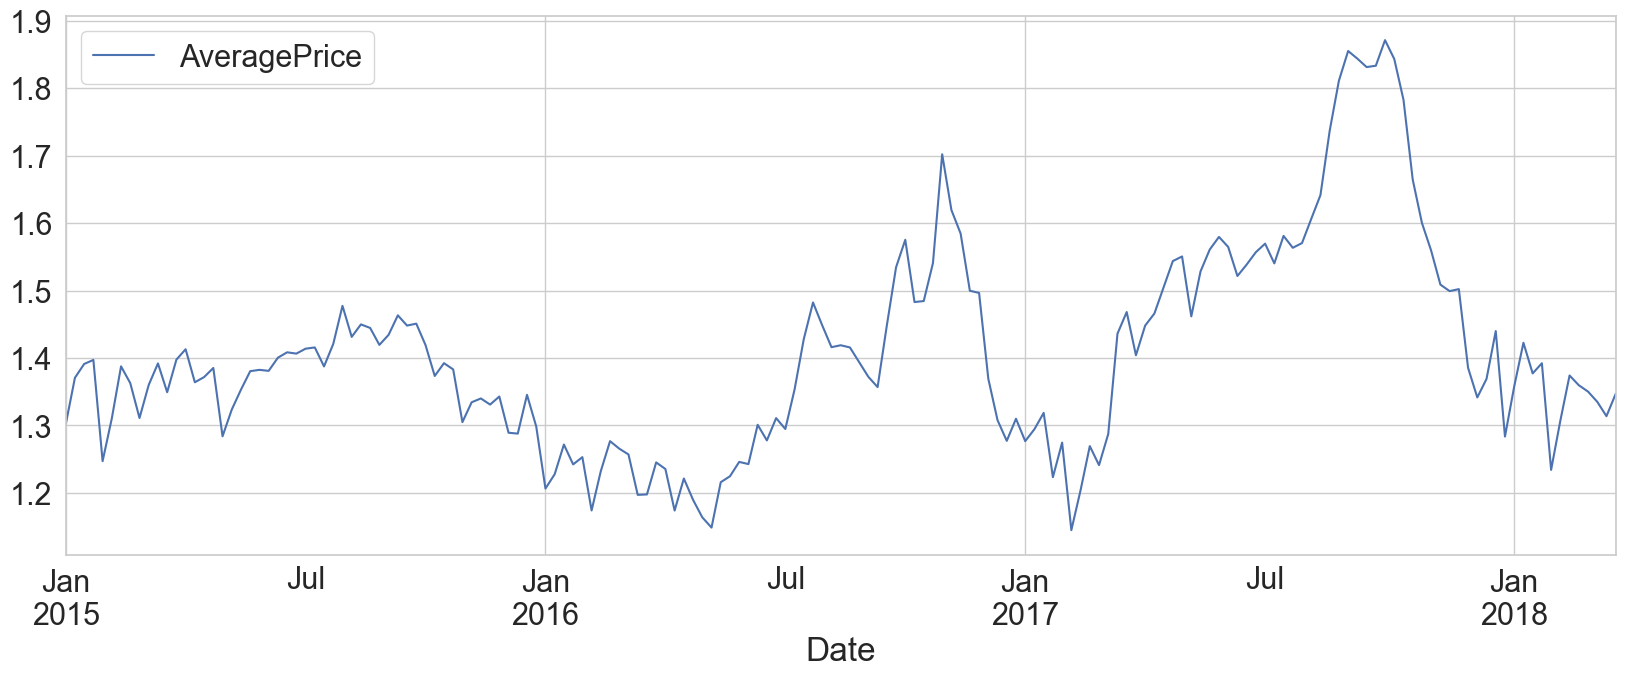

In [279]:
# График скользящего среднего
first.plot()

# Задача 2 "Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее. Запишите результат в avocado_ewm."

In [280]:
avocado_ewm = avocado_mean.AveragePrice.ewm(span=2).mean()
avocado_ewm

0      1.301296
1      1.353310
2      1.379480
3      1.391394
4      1.294758
         ...   
164    1.356212
165    1.352194
166    1.340793
167    1.322734
168    1.338812
Name: AveragePrice, Length: 169, dtype: float64

# Задача 3 "Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс)."

## Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4.
## Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.

In [281]:
# Импорт данных из CSV файла, при этом первая колонка используется как индекс
avocado_full = pd.read_csv('D:/курс_архив/my_files/lesson_6/avocado_full.csv',index_col=0)
avocado_full # Отображение данных для проверки

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [282]:
# Сброс индекса, чтобы индекс стал обычной колонкой, и индексы заново были назначены автоматически
avocado_full = avocado_full.reset_index()
avocado_full # Отображение данных для проверки после сброса индекса

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
18245,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18246,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
18247,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [283]:
# Фильтрация данных по типу авокадо (organic) и региону (Chicago)
# Группировка данных по дате и нахождение среднего значения цены за день (AveragePrice)
# Применение скользящего среднего с окном в 4 дня и округление до 3 знаков
# Данные сортируются по индексу (дате)
first = avocado_full.query('type == "organic" and region == "Chicago"') \
    .groupby(['Date'])['AveragePrice'] \
    .mean() \
    .rolling(4).mean().round(3) \
    .sort_index()  # Сортировка по индексу (дата)
first  # Отображение результата

Date
2015-01-04      NaN
2015-01-11      NaN
2015-01-18      NaN
2015-01-25    1.730
2015-02-01    1.738
              ...  
2018-02-25    1.652
2018-03-04    1.652
2018-03-11    1.655
2018-03-18    1.655
2018-03-25    1.658
Name: AveragePrice, Length: 169, dtype: float64

In [284]:
# Удаление всех строк с пропусками после применения скользящего среднего
first = first.dropna()

In [285]:
# Сброс индекса для преобразования индекса в обычный столбец (возвращение к исходной структуре)
first = first.reset_index()
first.query('Date == "2016-08-21"') # Поиск записи на дату 21 августа 2016 года

,Date,AveragePrice
82,2016-08-21,2.102


In [286]:
# Преобразование столбца 'Date' в формат datetime, чтобы даты отображались правильно на графике
first['Date'] = pd.to_datetime(first.Date) 

<Axes: xlabel='Date', ylabel='AveragePrice'>

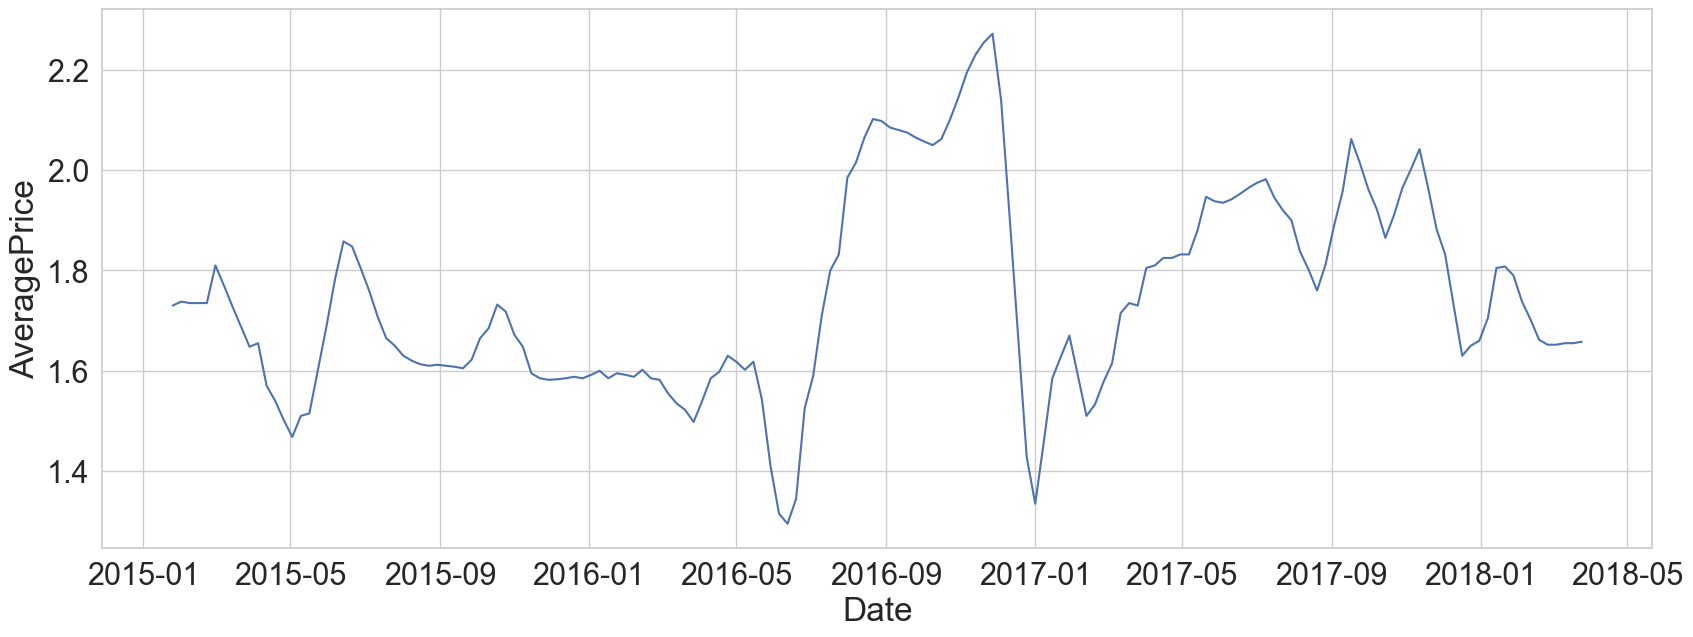

In [287]:
# Построение линейного графика для скользящего среднего (rolling mean)
sns.lineplot(x='Date', y='AveragePrice', data=first)

In [288]:
# Повторяем процесс для экспоненциального скользящего среднего:
# Фильтрация данных по типу авокадо (organic) и региону (Chicago)
# Группировка данных по дате и нахождение среднего значения цены за день (AveragePrice)
# Применение экспоненциального скользящего среднего с параметром span=4 и округление до 3 знаков
# Сортировка данных по индексу (дате)
second = avocado_full.query('type == "organic" and region == "Chicago"') \
    .groupby(['Date'])['AveragePrice'] \
    .mean() \
    .sort_index() \
    .ewm(span=4).mean().round(3)
second # Отображение результата

Date
2015-01-04    1.490
2015-01-11    1.678
2015-01-18    1.745
2015-01-25    1.784
2015-02-01    1.670
              ...  
2018-02-25    1.677
2018-03-04    1.654
2018-03-11    1.656
2018-03-18    1.658
2018-03-25    1.671
Name: AveragePrice, Length: 169, dtype: float64

In [289]:
# Удаление всех строк с пропусками после применения экспоненциального скользящего среднего
second = second.dropna()

In [290]:
# Сброс индекса для преобразования индекса в обычный столбец
second = second.reset_index()
second.query('Date == "2017-02-19"') # Поиск записи на дату 19 февраля 2017 года

,Date,AveragePrice
111,2017-02-19,1.562


In [291]:
# Преобразование столбца 'Date' в формат datetime, чтобы даты отображались правильно на графике
second['Date'] = pd.to_datetime(second.Date)

<Axes: xlabel='Date', ylabel='AveragePrice'>

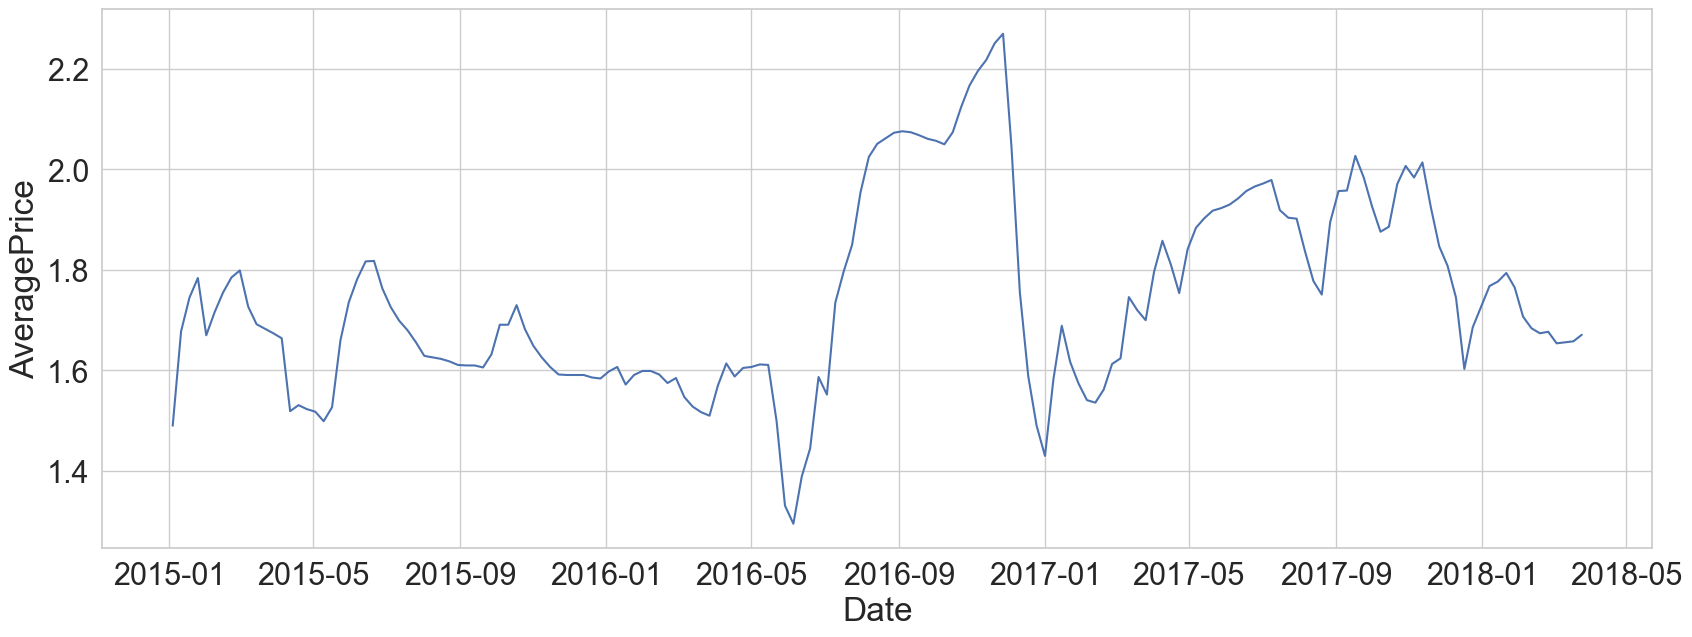

In [292]:
# Построение линейного графика для экспоненциального скользящего среднего (ewm)
sns.lineplot(x='Date', y='AveragePrice', data=second)

In [293]:
# Проверка значения для даты 19 февраля 2017 года в данных для скользящего среднего
first.query('Date == "2017-02-19"')

C:\Users\bedzh\AppData\Local\Temp\ipykernel_2960\517247507.py:2: FutureWarning:

The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.



,Date,AveragePrice
108,2017-02-19,1.533


# Вывод: Ряд, полученный с помощью  ЭКСПОНЕНЦИАЛЬНОГО СКОЛЬЗЯЩЕГО СРЕДНЕГО на промежутке с июля 2016 до декабря 2016 является более сглаженным. Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна 2.102, что  БОЛЬШЕ чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось 1.562, и было БОЛЬШЕ чем при использовании rolling(), для которого значение было равно 1.532

# Задача 4: Далее будем работать с данными по опозданиям в заключении сделок.

## В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали.
### Прочитайте эти данные. Далее переведите delay в timedelta формат.

In [294]:
# Чтение данных из CSV файла
delay = pd.read_csv('D:/курс_архив/my_files/lesson_6/delays.csv')

In [295]:
# Просмотр первых строк датафрейма
delay

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [296]:
# Проверка типов данных в каждой колонке
delay.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

In [297]:
# Удаление возможных знаков минуса "-" в колонке 'delay', если задержка отрицательная
# Это заменяет отрицательные значения (время с минусом) на положительные
delay['delay'] = delay.delay.str.replace('-', '')
delay # Просмотр датафрейма после замены

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48.000000000,705436
1,7614,9544,4 days 02:14:23.000000000,859266
2,2052,2427,0 days 06:08:57.000000000,812416
3,9635,8054,0 days 23:40:19.000000000,162312
4,8154,5503,1 days 13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08.000000000,602129
260,2384,2364,3 days 23:27:14.000000000,910660
261,5146,3331,1 days 15:22:34.000000000,401137
262,7203,5532,2 days 17:15:02.000000000,308979


In [298]:
# Преобразование значений в колонке 'delay' в тип timedelta для работы с временными интервалами
delay['delay'] = pd.to_timedelta(delay.delay)
delay # Проверка изменений

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


In [299]:
delay.dtypes # Проверка типов данных, чтобы убедиться, что 'delay' теперь является типом timedelta

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

# Задача 5: Время это хорошо, но хотелось бы также разделить его на промежутки. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

In [300]:
delay

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


In [301]:
# Преобразуем временные интервалы в количество дней (в float)
delay['delay_in_days'] = delay['delay'].dt.total_seconds() / (24 * 3600)

In [302]:
# Используем pd.cut() для разбивки на 3 категории
bins = [0, 1, 2, 3]  # Границы интервалов в днях
labels = [1, 2, 3]  # Метки для категорий

In [303]:
delay['delay_categorical'] = pd.cut(delay['delay_in_days'], bins=bins, labels=labels, right=True, include_lowest=True)

In [304]:
delay

,client_id,company_id,delay,revenue,delay_in_days,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1.623472,2
1,7614,9544,4 days 02:14:23,859266,4.093322,NaN
2,2052,2427,0 days 06:08:57,812416,0.256215,1
3,9635,8054,0 days 23:40:19,162312,0.986331,1
4,8154,5503,1 days 13:21:53,658844,1.556863,2
...,...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,0.230648,1
260,2384,2364,3 days 23:27:14,910660,3.977245,NaN
261,5146,3331,1 days 15:22:34,401137,1.640671,2
262,7203,5532,2 days 17:15:02,308979,2.718773,3


# Задача 6: Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были:

### 'less than 1 day' – время от 0 до 1 дня
### '1-2 days' – от 1 до 2 дней
### '2-3 days' – от 2 до 3 дней
### 'more than 3 days' – больше 3 дней

In [305]:
delay['delay_categorical'] = pd.cut(delay.delay, bins=pd.to_timedelta(['0d', '1d', '2d', '3d', '106751 days 23:47:16.854775']), labels= ['less than 1 day',
                                                                                                      '1-2 days', 
                                                                                                      '2-3 days',
                                                                                                      'more than 3 days'])

In [306]:
delay

,client_id,company_id,delay,revenue,delay_in_days,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1.623472,1-2 days
1,7614,9544,4 days 02:14:23,859266,4.093322,more than 3 days
2,2052,2427,0 days 06:08:57,812416,0.256215,less than 1 day
3,9635,8054,0 days 23:40:19,162312,0.986331,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1.556863,1-2 days
...,...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,0.230648,less than 1 day
260,2384,2364,3 days 23:27:14,910660,3.977245,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1.640671,1-2 days
262,7203,5532,2 days 17:15:02,308979,2.718773,2-3 days


# Задача 7: Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки. 

In [307]:
step10 = delay.groupby('delay_categorical', as_index=False) \
    .agg({'delay': 'count'}) \
    .sort_values('delay', ascending=False)
step10

C:\Users\bedzh\AppData\Local\Temp\ipykernel_2960\3685018166.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,delay_categorical,delay
3,more than 3 days,107
0,less than 1 day,59
1,1-2 days,51
2,2-3 days,47


C:\Users\bedzh\AppData\Local\Temp\ipykernel_2960\1717688080.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




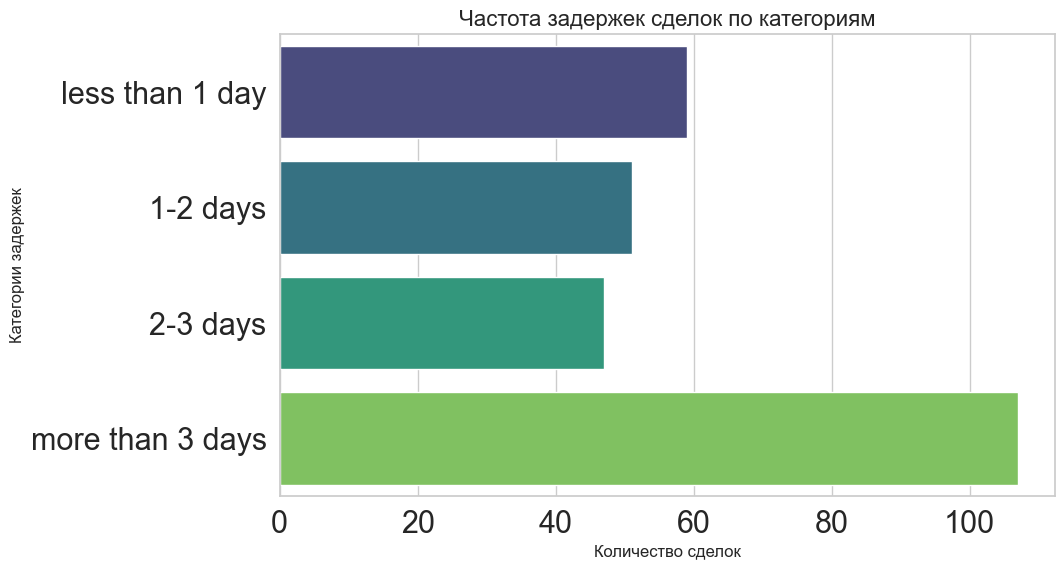

In [308]:
plt.figure(figsize=(10, 6))

# Создаем барплот с помощью seaborn
sns.barplot(x='delay', y='delay_categorical', data=step10, palette='viridis')

# Добавляем заголовок и метки осей
plt.title('Частота задержек сделок по категориям', fontsize=16)
plt.xlabel('Количество сделок', fontsize=12)
plt.ylabel('Категории задержек', fontsize=12)

# Показать график
plt.show()